# Handwritten Digit Recognition with CNN

The **MNIST** dataset consists of 60,000 grayscale images of handwritten digits (0-9), each 28x28 pixels. In this project, we use a **Convolutional Neural Network (CNN)** to classify these digits.

The dataset is split into training and test sets, with 60,000 images for training and 10,000 for testing. The goal is to build a CNN model that can accurately predict the digit in an image.

**Key Steps:**
- **Data Preprocessing**: Normalize images to the range [0, 1].
- **Model**: A CNN with convolutional layers, max-pooling layers, and dense layers.
- **Evaluation**: Measure model accuracy on the test set.

This project demonstrates how CNNs can effectively classify handwritten digits from the MNIST dataset.

## 1. Importing Dataset

In [54]:
from keras.datasets import mnist

data = mnist.load_data()

In [55]:
type(data)

tuple

## 2. Split the Dataset into Test and Train

In [56]:
(X_train, y_train), (X_test, y_test) = data

In [57]:
X_train.shape

(60000, 28, 28)

**Shape of `X_train`: **(60000, 28, 28)****

- **60000**: The total number of images in the training set.
- **28**: The height (number of rows) of each image.
- **28**: The width (number of columns) of each image.

Each element in the `X_train` array is a 28x28 grid representing a grayscale image, where each pixel's intensity is an integer value between 0 and 255. The shape `(28, 28)` represents a single image, and there are 60,000 such images in the training dataset.


## 3. Visualizing the Data

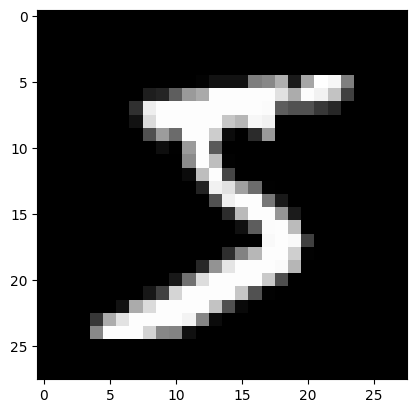

In [58]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')     # Displaying the image in grayscale
plt.show()

In [59]:
y_train.shape

(60000,)

`y_train` is a 1D array of shape `(60000,)`, where each element corresponds to the label (digit) for the respective image in  `X_train`.

In [60]:
y_train[0]

5

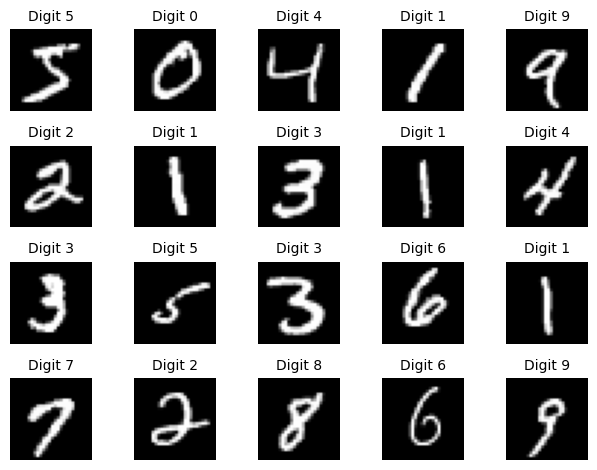

In [61]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Digit {y_train[i]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [62]:
X_test.shape

(10000, 28, 28)

In [63]:
y_test.shape

(10000,)

### PCA for Visualizing MNIST Digits in 2D

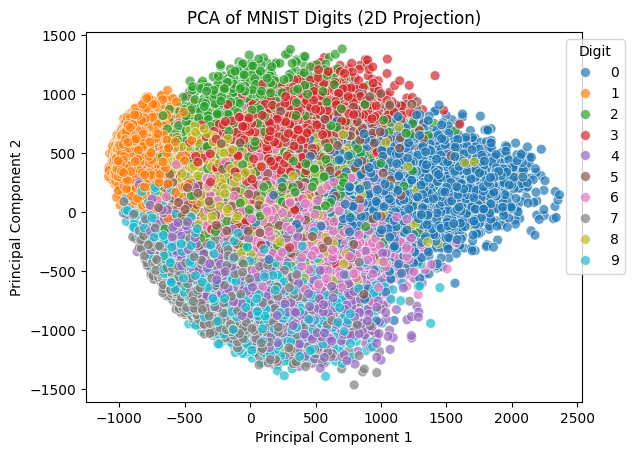

In [66]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

# Flatten the images (28x28 to 784 features)
X_train_flattened = X_train.reshape(-1, 28*28)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flattened)

# Create a DataFrame for better visualization and hue mapping
df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df['digit'] = y_train  # Using the actual labels

# Plot the 2D scatter plot with hue as the target labels (digits)
sns.scatterplot(data=df, x='PC1', y='PC2', hue='digit', palette='tab10', s=50, alpha=0.7)
plt.title('PCA of MNIST Digits (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit', loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()

- **Digit 0**: Forms a tight, distinct cluster due to its circular shape.
- **Digit 1**: Forms a small, isolated cluster, driven by its vertical line structure.

- **Overlapping Clusters**:
  - **Digits 7, 4, and 9**: Overlap due to similar curved and open-loop features.
  - **Digits 3 and 8**: Overlap due to circular components and handwriting variations.
  - **Digits 5 and 6**: Overlap due to shared curved components in certain styles.

## 4. Normalization of Data

**Normalization** is the process of scaling input data to a specific range, typically [0, 1] or [-1, 1], instead of leaving the data in its original range.

##### Why Normalize?

In deep learning, dividing pixel values by 255 is a common normalization step, especially for images. Here's why:

1. **Pixel Value Range**: Images typically have pixel values ranging from 0 to 255. Dividing by 255 scales the values to a [0, 1] range, making them easier for neural networks to process.

2. **Improved Training**: Normalized values help stabilize the training process by ensuring the input data is on a consistent scale, which speeds up convergence.

3. **Better Activation Function Performance**: Most activation functions (like Sigmoid or ReLU) work better with inputs in a smaller range, preventing issues like vanishing or exploding gradients.

Hence, dividing by 255 normalizes the input data, ensuring faster, more stable training for deep learning models.


In [11]:
X_train = X_train / 255
X_test = X_test / 255

In deep learning, **one-hot encoding** is commonly used for the target variable in classification tasks, espicially multi-class classification. Here's why:

1. **Category Representation**: One-hot encoding converts categorical labels (e.g., 0, 1, 2) into binary vectors, where each class is represented by a vector with a `1` in the position corresponding to the class and `0` elsewhere.

2. **Model Output**: For multi-class classification, the model outputs a probability distribution over the classes using a **softmax** function. One-hot encoding ensures that the model can correctly interpret and match predicted probabilities to the true class.

3. **Loss Function**: One-hot encoding is required when using **categorical cross-entropy** as the loss function. This loss function compares the predicted probability distribution with the one-hot encoded target.

Hence, for multi-class classification in deep learning, one-hot encoding is essential for proper model training and evaluation. It allows the model to predict probabilities and compute loss correctly.


## 5. Reshape the Data for CNN

Since the CNN expects the input data to have a shape of` (28, 28, 1)` (for grayscale), we need to reshape the data.

In [12]:
# Reshape the input data for CNN (28x28 image with 1 color channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [13]:
X_train.shape

(60000, 28, 28, 1)

## 6. One-Hot Encoding of Labels

One-hot encoding is used to represent the target labels in a binary matrix format, which is needed for multi-class classification.

In [14]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train.shape

(60000, 10)

In [16]:
y_test.shape

(10000, 10)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

The first target label `5` in the train set is one-hot encoded as `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`.


## 7. Building the CNN Model

Let's define a simple CNN with two convolutional layers followed by max-pooling and a dense output layer.

In [18]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Input layer specifying the shape of the input image (28x28 pixels, 1 channel for grayscale)
model.add(Input(shape=(28, 28, 1)))

# First Conv Layer with 32 filters of size 3x3, followed by MaxPooling
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv Layer with 64 filters of size 3x3, followed by MaxPooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into the Dense layers
model.add(Flatten())

# Dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Output layer with 10 units (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

In [19]:
# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 8. Training the Model

In [20]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8688 - loss: 0.4471 - val_accuracy: 0.9768 - val_loss: 0.0758
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9822 - loss: 0.0562 - val_accuracy: 0.9860 - val_loss: 0.0418
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9882 - loss: 0.0372 - val_accuracy: 0.9858 - val_loss: 0.0406
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9889 - val_loss: 0.0319
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.9909 - val_loss: 0.0288
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9955 - loss: 0.0147 - val_accuracy: 0.9913 - val_loss: 0.0264
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9957 - loss: 0.0127 - val_accuracy: 0.9897 - val_loss: 0.0321
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.

## 9. Evaluating the Model

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9850 - loss: 0.0439
Test Accuracy: 0.9901000261306763


## 10. Visualizing Training Progress

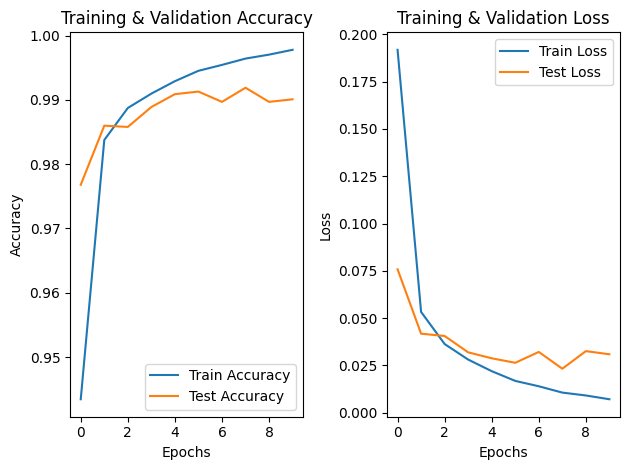

In [22]:
# First subplot for training & validation accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Second subplot for training & validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.tight_layout()
plt.show()

## 11. Predicting a New Handwritten Digit Image

In [28]:
from PIL import Image
import numpy as np

def predict_digit(img_path):
    # Load, preprocess, and resize the image
    img = Image.open(img_path).convert('L').resize((28, 28))  # Convert to grayscale and resize

    # Display the image
    plt.figure(figsize=(3,3))
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

    # Normalize and reshape the image
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape to (1, 28, 28, 1)

    # Make the prediction
    predicted_class = model.predict(img_array)
    predicted_digit = np.argmax(predicted_class)    # Get the index of the highest probability
    print(f"\nPredicted Digit: {predicted_digit}")

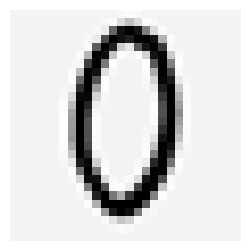

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Predicted Digit: 0


In [42]:
predict_digit('zero.jpg')

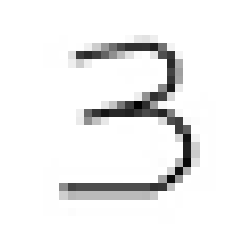

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Predicted Digit: 8


In [52]:
predict_digit('three.jpg')